<a href="https://colab.research.google.com/github/Rishapriakanth/Machine-learning-analysis/blob/main/Car_sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
data_path = '/content/Car Sales.xlsx - car_data.csv'
data = pd.read_csv(data_path)
data.head(5)


,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [5]:
data.tail(5)

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin
23905,C_CND_023906,12/31/2023,Donovan,Male,1225000,Pars Auto Sales,Lexus,ES300,DoubleÂ Overhead Camshaft,Auto,Pale White,27500,38701-8047,Hardtop,7020564,Middletown


In [6]:
data.shape

(23906, 16)

In [7]:
data.isna().sum()

Car_id           0
Date             0
Customer Name    0
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23906 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [10]:
data.nunique()

Car_id           23906
Date               612
Customer Name     3022
Gender               2
Annual Income     2508
Dealer_Name         28
Company             30
Model              154
Engine               2
Transmission         2
Color                3
Price ($)          870
Dealer_No            7
Body Style           5
Phone            23804
Dealer_Region        7
dtype: int64

In [12]:
data.describe()

,Annual Income,Price ($),Phone
count,2.390600e+04,23906.000000,2.390600e+04
mean,8.308403e+05,28090.247846,7.497741e+06
std,7.200064e+05,14788.687608,8.674920e+05
min,1.008000e+04,1200.000000,6.000101e+06
25%,3.860000e+05,18001.000000,6.746495e+06
50%,7.350000e+05,23000.000000,7.496198e+06
75%,1.175750e+06,34000.000000,8.248146e+06
max,1.120000e+07,85800.000000,8.999579e+06


In [13]:
print("The categories in the variable 'Gender': ",end=" ")
print(data['Gender'].unique())

print("The categories in the variable 'Company': ",end=" ")
print(data['Company'].unique())

print("The categories in the variable 'Engine': ",end=" ")
print(data['Engine'].unique())

print("The categories in the variable 'Transmission': ",end=" ")
print(data['Transmission'].unique())

print("The categories in the variable 'Color': ",end=" ")
print(data['Color'].unique())

print("The categories in the variable 'Body Style': ",end=" ")
print(data['Body Style'].unique())

print("The categories in the variable 'Dealer_Region': ",end=" ")
print(data['Dealer_Region'].unique())

The categories in the variable 'Gender':  ['Male' 'Female']
The categories in the variable 'Company':  ['Ford' 'Dodge' 'Cadillac' 'Toyota' 'Acura' 'Mitsubishi' 'Chevrolet'
 'Nissan' 'Mercury' 'BMW' 'Chrysler' 'Subaru' 'Hyundai' 'Honda' 'Infiniti'
 'Audi' 'Porsche' 'Volkswagen' 'Buick' 'Saturn' 'Mercedes-B' 'Jaguar'
 'Volvo' 'Pontiac' 'Lincoln' 'Oldsmobile' 'Lexus' 'Plymouth' 'Saab' 'Jeep']
The categories in the variable 'Engine':  ['DoubleÂ\xa0Overhead Camshaft' 'Overhead Camshaft']
The categories in the variable 'Transmission':  ['Auto' 'Manual']
The categories in the variable 'Color':  ['Black' 'Red' 'Pale White']
The categories in the variable 'Body Style':  ['SUV' 'Passenger' 'Hatchback' 'Hardtop' 'Sedan']
The categories in the variable 'Dealer_Region':  ['Middletown' 'Aurora' 'Greenville' 'Pasco' 'Janesville' 'Scottsdale'
 'Austin']


In [14]:
print(data['Engine'].value_counts()['DoubleÂ\xa0Overhead Camshaft'])
data['Engine'] = data['Engine'].replace('DoubleÂ\xa0Overhead Camshaft', 'Double Overhead Camshaft')
print(data['Engine'].unique())

12571
['Double Overhead Camshaft' 'Overhead Camshaft']


In [15]:
num_feature = [feature for feature in data.columns if data[feature].dtype != 'O']

cat_feature = [feature for feature in data.columns if data[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(num_feature), num_feature))
print('We have {} categorical features : {}'.format(len(cat_feature), cat_feature))

We have 3 numerical features : ['Annual Income', 'Price ($)', 'Phone']
We have 13 categorical features : ['Car_id', 'Date', 'Customer Name', 'Gender', 'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color', 'Dealer_No ', 'Body Style', 'Dealer_Region']


In [16]:
drop_col = ['Phone','Car_id','Customer Name','Dealer_Name','Dealer_No ']
df = data.drop(drop_col,axis=1)

In [17]:
df.head()

,Date,Gender,Annual Income,Company,Model,Engine,Transmission,Color,Price ($),Body Style,Dealer_Region
0,1/2/2022,Male,13500,Ford,Expedition,Double Overhead Camshaft,Auto,Black,26000,SUV,Middletown
1,1/2/2022,Male,1480000,Dodge,Durango,Double Overhead Camshaft,Auto,Black,19000,SUV,Aurora
2,1/2/2022,Male,1035000,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,Passenger,Greenville
3,1/2/2022,Male,13500,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,SUV,Pasco
4,1/2/2022,Male,1465000,Acura,TL,Double Overhead Camshaft,Auto,Red,24500,Hatchback,Janesville


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           23906 non-null  object
 1   Gender         23906 non-null  object
 2   Annual Income  23906 non-null  int64 
 3   Company        23906 non-null  object
 4   Model          23906 non-null  object
 5   Engine         23906 non-null  object
 6   Transmission   23906 non-null  object
 7   Color          23906 non-null  object
 8   Price ($)      23906 non-null  int64 
 9   Body Style     23906 non-null  object
 10  Dealer_Region  23906 non-null  object
dtypes: int64(2), object(9)
memory usage: 2.0+ MB


In [19]:
df.head()

,Date,Gender,Annual Income,Company,Model,Engine,Transmission,Color,Price ($),Body Style,Dealer_Region
0,1/2/2022,Male,13500,Ford,Expedition,Double Overhead Camshaft,Auto,Black,26000,SUV,Middletown
1,1/2/2022,Male,1480000,Dodge,Durango,Double Overhead Camshaft,Auto,Black,19000,SUV,Aurora
2,1/2/2022,Male,1035000,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,Passenger,Greenville
3,1/2/2022,Male,13500,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,SUV,Pasco
4,1/2/2022,Male,1465000,Acura,TL,Double Overhead Camshaft,Auto,Red,24500,Hatchback,Janesville


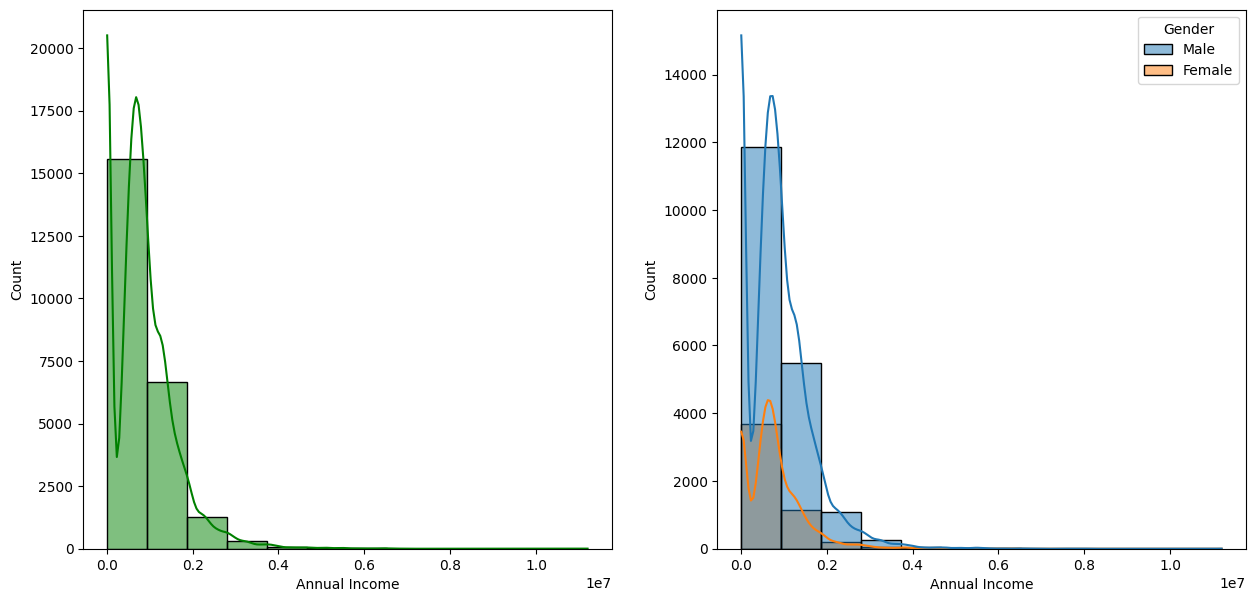

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Annual Income',bins=12,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Annual Income',bins=12,kde=True,hue='Gender')
plt.show()

In [21]:
min_salary = df['Annual Income'].min()
max_salary = df['Annual Income'].max()
print("The minimum salary (Annual) of a person that bought the car = {}".format(min_salary))
print("The maximum salary (Annual) of a person that bought the car = {}".format(max_salary))

The minimum salary (Annual) of a person that bought the car = 10080
The maximum salary (Annual) of a person that bought the car = 11200000


<Axes: xlabel='Gender', ylabel='count'>

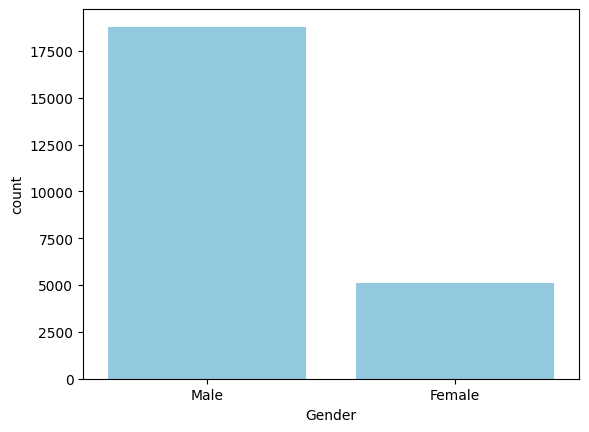

In [22]:
sns.countplot(data=df,x='Gender',color='skyblue')

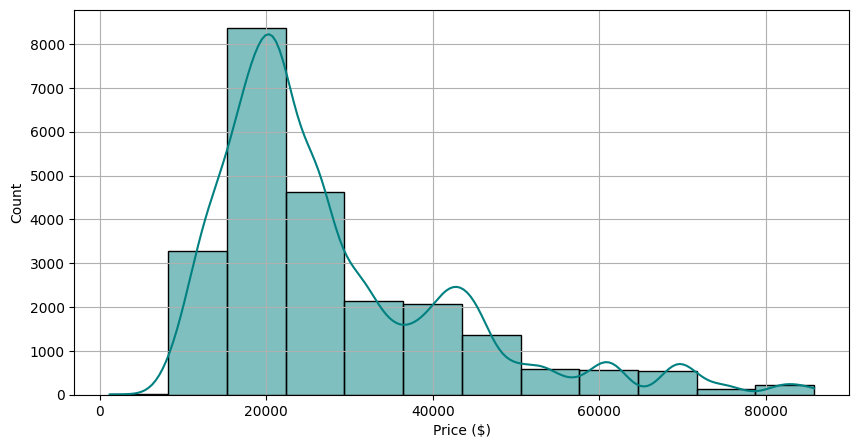

In [23]:
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
plt.subplot(111)
sns.histplot(data=df,x='Price ($)',bins=12,kde=True,color='teal')
plt.grid()
plt.show()

<Axes: xlabel='count', ylabel='Company'>

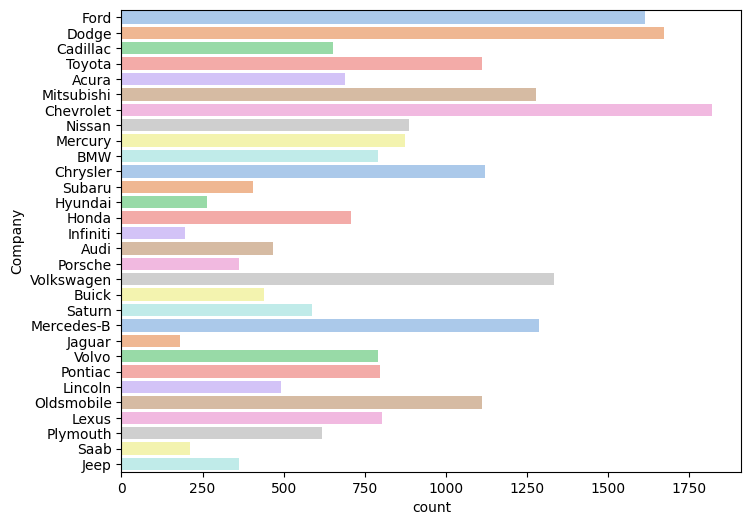

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df,y='Company',palette = 'pastel')

<Axes: xlabel='count', ylabel='Model'>

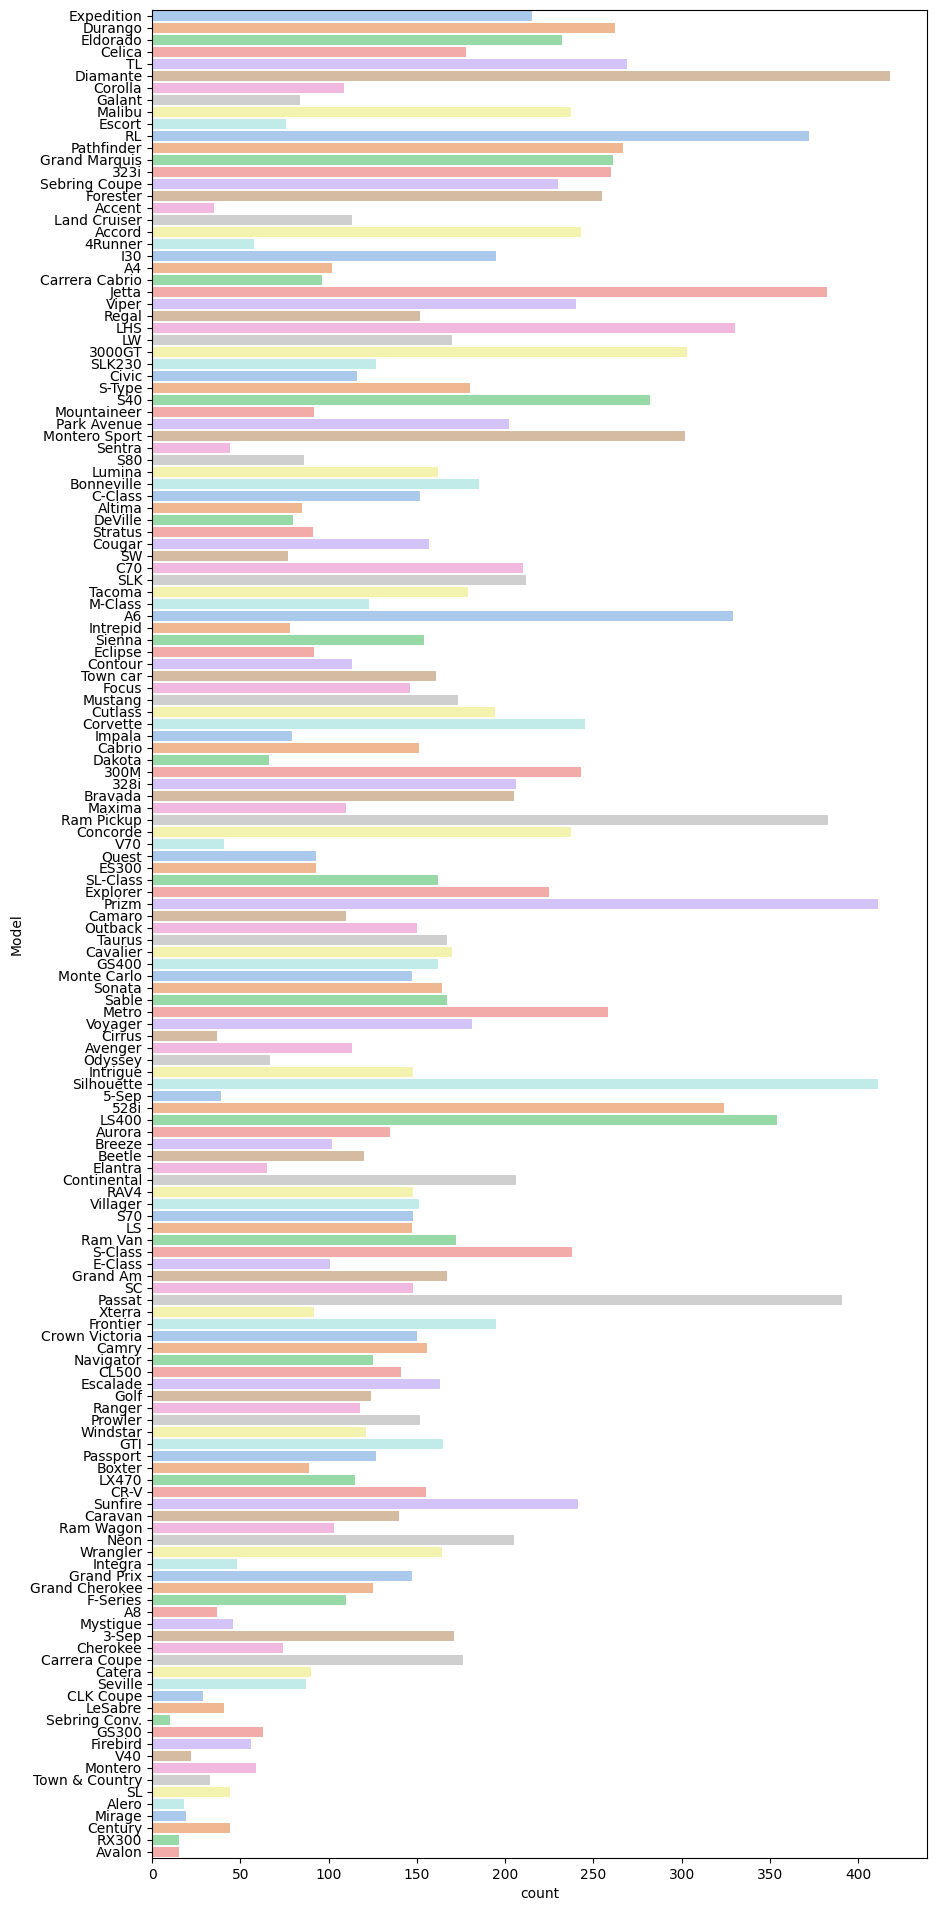

In [25]:
plt.figure(figsize=(10, 24))
sns.countplot(data=df,y='Model',palette = 'pastel')

<Axes: xlabel='Engine', ylabel='count'>

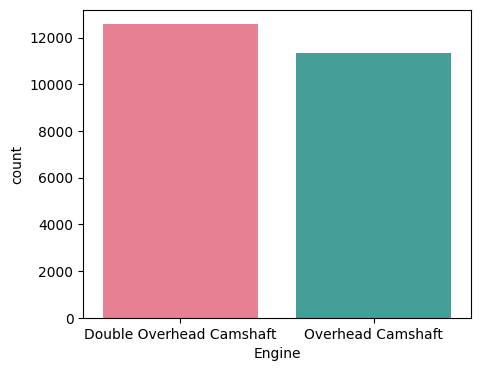

In [26]:
plt.figure(figsize=(5, 4))
sns.countplot(data=df,x='Engine',palette='husl')

<Axes: xlabel='Transmission', ylabel='count'>

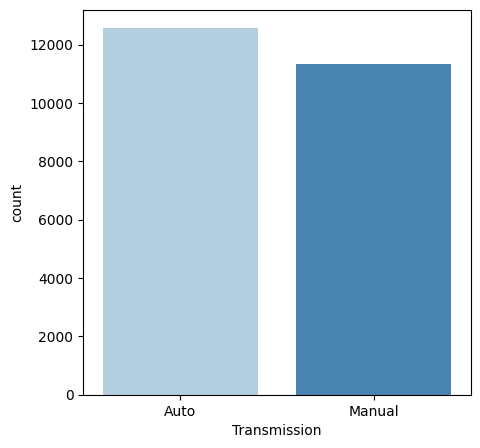

In [27]:
plt.figure(figsize=(5, 5))
sns.countplot(data=df,x='Transmission',palette = 'Blues')

<Axes: xlabel='Color', ylabel='count'>

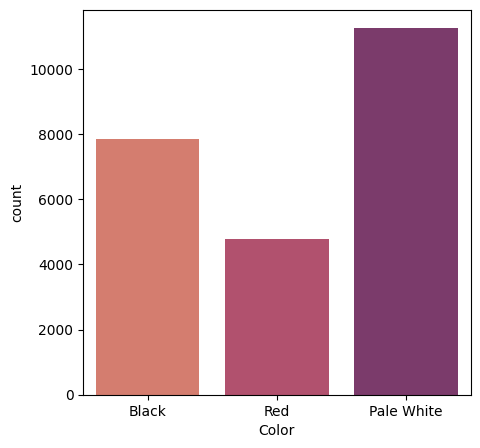

In [28]:
plt.figure(figsize=(5, 5))
sns.countplot(data=df,x='Color',palette = 'flare')

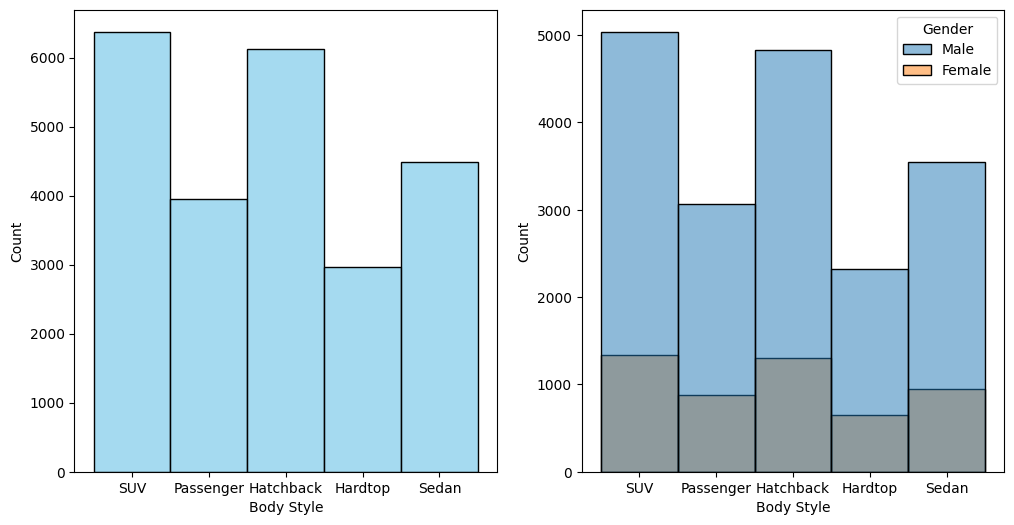

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
plt.subplot(121)
sns.histplot(data=df,x='Body Style',color='skyblue')
plt.subplot(122)
sns.histplot(data=df,x='Body Style',hue='Gender')
plt.show()

<Axes: xlabel='Dealer_Region', ylabel='count'>

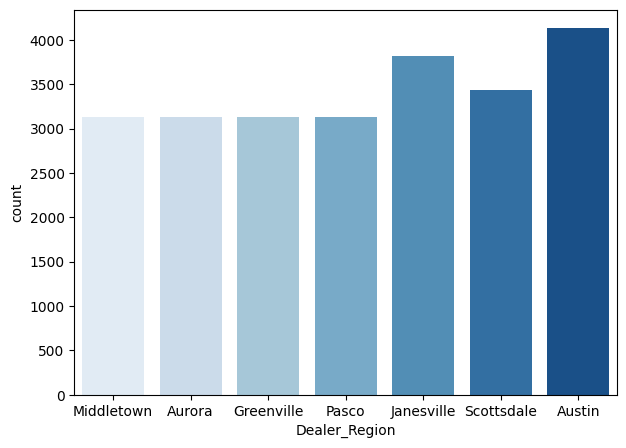

In [30]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df,x='Dealer_Region',palette = 'Blues')

<Axes: xlabel='Price ($)', ylabel='Transmission'>

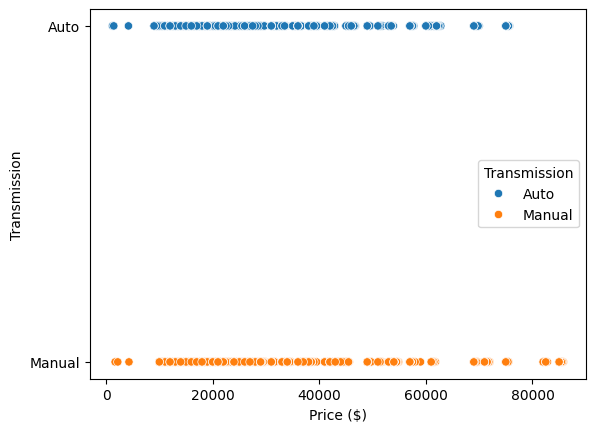

In [31]:
sns.scatterplot(data=df,x='Price ($)',y='Transmission',hue='Transmission')

<Figure size 1000x1000 with 0 Axes>

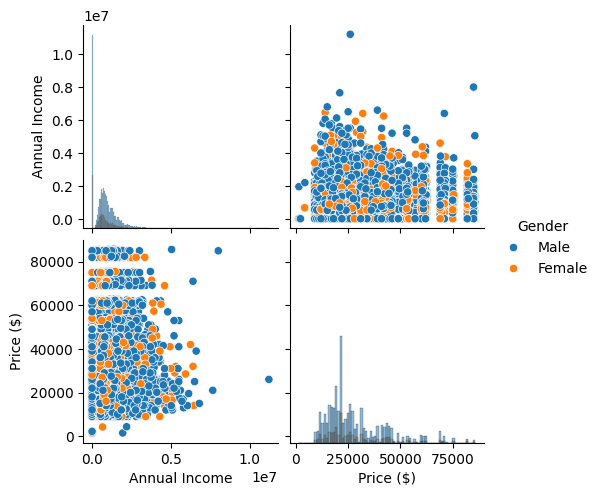

In [32]:
plt.figure(figsize=(10, 10))
sns.pairplot(data=df,hue='Gender',kind='scatter',diag_kind='hist')

<Figure size 500x500 with 0 Axes>

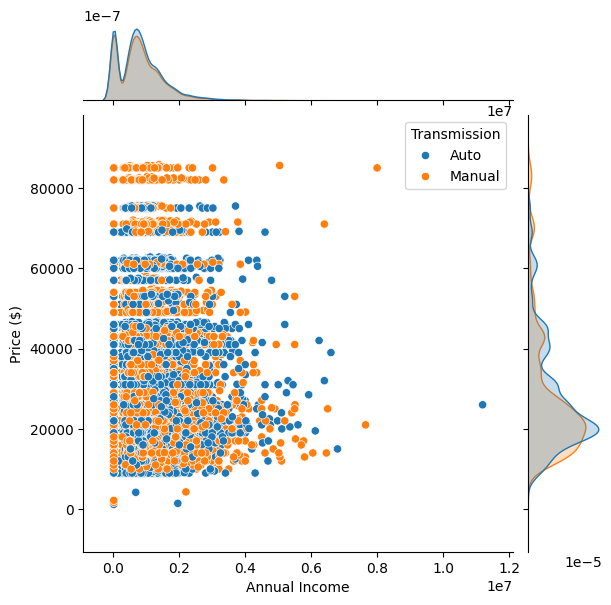

In [33]:
plt.figure(figsize=(5, 5))
sns.jointplot(data=df,x='Annual Income',y='Price ($)',hue='Transmission')

<Figure size 500x500 with 0 Axes>

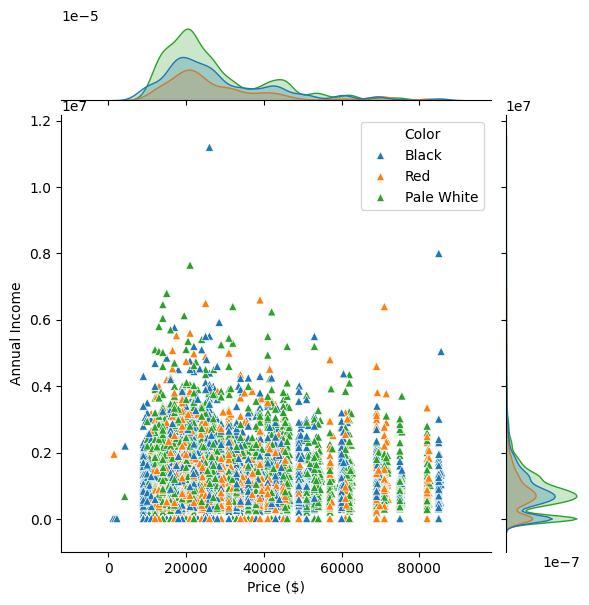

In [34]:
plt.figure(figsize=(5, 5))
sns.jointplot(data=df,x='Price ($)',y='Annual Income',hue='Color',marker='^')

<Axes: xlabel='Price ($)', ylabel='Body Style'>

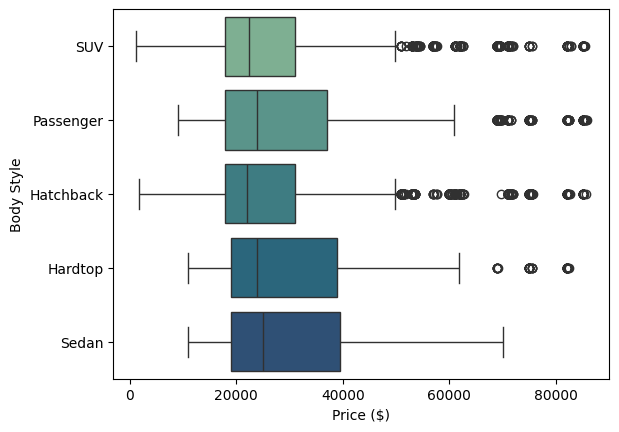

In [35]:
sns.boxplot(data=df, x="Price ($)", y="Body Style",hue='Body Style',palette = 'crest')

<Axes: xlabel='Price ($)', ylabel='Engine'>

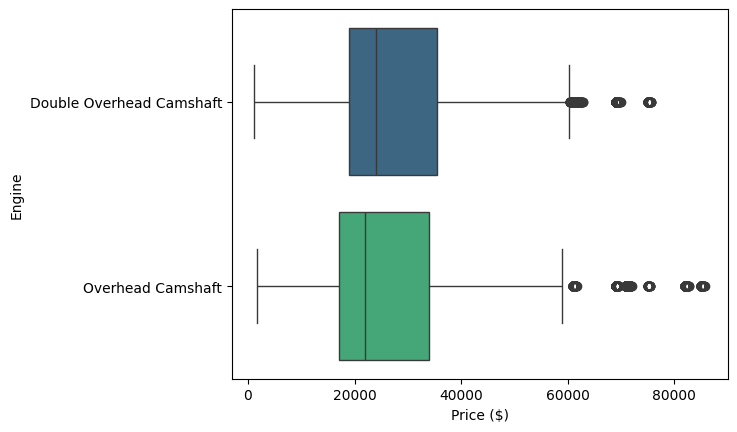

In [36]:
sns.boxplot(data=df, x="Price ($)", y="Engine",hue='Engine',palette = 'viridis')